<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/Caracterizacion_LDA_POO_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterizacion Distribucion Agregada de Perdidas**

Se quiere caracterizar la distribucion agregada de perdidas como resutltado de las perdidas asociadas a los creditos que posee una FINTECH. Las variables que defien la Loss Distribution Approach (LDA) se obtiene del producto de las siguientes variables:
* Monto (EAD): Es el monto de dinero que una persona solicita a la FINTECH.
* Probabilidad Default(PD): Es la probabilidad de que una persona incumpla el credito a lo largo de su vigencia.
* LGD(Loss Guatantee Default): La garantia que el solicitante puede colocar sobre el credito (Carro, casa beca, finca).

0. Se cargan las librerias de trabajo

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para grafico de distribuciones
from scipy.stats import skew, kurtosis #Para caracterizacion de distribucion

In [2]:
from google.colab import drive #Conexion automatica con el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
# @title 1. Método: Histograma de Frecuencias
#Variables de entrada: Distribucción de las Pérdidas
#Variables de Salida: Limite Inferior, Limite Superior, Número de Datos
#Marca de Clase del Histograma de Frecuencias

def Histx(LDA): #Nombre de su método
  NC= 10

  plt.figure()
  sns.histplot(LDA,bins=NC,kde=True, color="pink") #Kde: representa la cobertura de la distribucion de probabilidad
  plt.title("Distribucion LDA")
  plt.show()

  #Obtenemos la informacion de la distribucion

  counts, bin_edges = np.histogram(LDA, bins=NC)
  LI= bin_edges[:-1];LS=bin_edges[1:]
  mc=(LI+LS)/2 #El valor representativo de cada intervalo

  return LI,LS,counts, mc

In [35]:
# @title 2. Caracterización de la Distribución de Pérdidas
#Variables de Entradas:
def Caractx(e3,e4):

  counts=e3;mc=e4
  u=np.sum(mc*counts)/np.sum(counts) #Valor esperado
  varianza=np.sum(counts*(mc-u)**2)/np.sum(counts) #que tan lejos estan los datos de la media
  desviacion=np.sqrt(varianza)

  #Quiero identificar datos raros o outliers
  LIe= u-2*desviacion;LSe=u+2*desviacion
  filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]

  #Coeficiente de asimetría
  cas=np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
  vcas=(skew(LDA)-cas)/skew(LDA)

  #Coeficiente de curtosis
  curt=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3

  return u,varianza,desviacion,cas,curt,filas_out

In [40]:
# @title 3. Caracterizacón de las Pérdidas de la Distribución Agregada
#Variables de entrada: Media de la LDA
#Variables de salida: Pérdidas Esperadas, OpVar, Pérdidas Catastróficas,
#Pérdidas No Esperadas

def Perdx(e5):
  u=e5
  PE=len(np.where(LDA<u)[0])
  OpVar=np.percentile(LDA,99.9)
  PC=len(np.where(LDA>OpVar)[0])
  PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])

  return PE,OpVar,PC,PNE

Año 1
Hoja 5


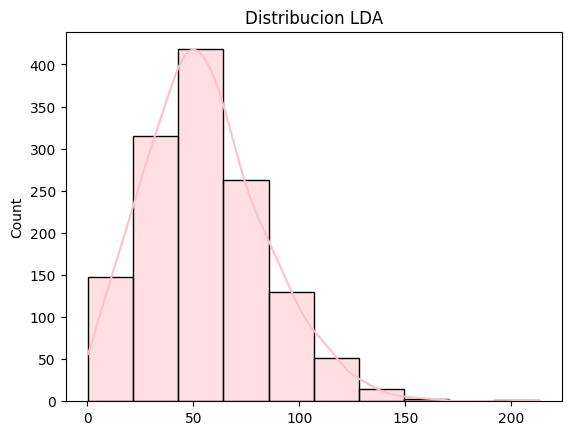

,LI,LS,ND,Perdida
0,0.413092,21.695260,147.0,11.054176
1,21.695260,42.977428,315.0,32.336344
2,42.977428,64.259597,418.0,53.618513
3,64.259597,85.541765,263.0,74.900681
4,85.541765,106.823933,130.0,96.182849
5,106.823933,128.106101,51.0,117.465017
6,128.106101,149.388270,14.0,138.747186
7,149.388270,170.670438,3.0,160.029354
8,170.670438,191.952606,0.0,181.311522
9,191.952606,213.234775,1.0,202.593690


La media de los datos es:  55.91800167999396
La varianza de los datos es:  836.1104127631511
La desviacion de los datos es:  28.91557387919443
La asimetría de los datos es:  0.5936899030624092
La curtosis de los datos es:  0.49072605058951346
Los outliers se ubican en:  [  16   26   46   81   85  138  190  231  246  292  296  363  371  410
  411  467  475  495  528  571  576  597  602  613  718  796  801  828
  831  837  839  853  854  864  917 1034 1063 1099 1108 1134 1191 1228
 1330]
Las pérdidas esperadas son:  729
El costo de aseguramiento de cada credito:  161.29129989014118
Las pérdidas catastróficas son:  2
Las pérdidas no esperadas son:  611
Año 2
Hoja 4


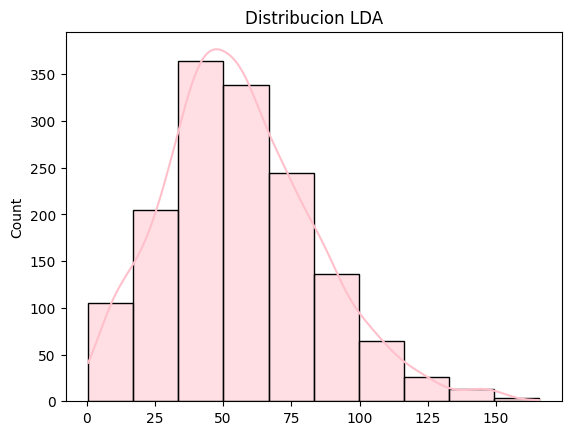

,LI,LS,ND,Perdida
0,0.568346,17.091246,105.0,8.829796
1,17.091246,33.614145,205.0,25.352695
2,33.614145,50.137045,364.0,41.875595
3,50.137045,66.659945,338.0,58.398495
4,66.659945,83.182844,244.0,74.921395
5,83.182844,99.705744,136.0,91.444294
6,99.705744,116.228644,65.0,107.967194
7,116.228644,132.751544,26.0,124.490094
8,132.751544,149.274443,13.0,141.012993
9,149.274443,165.797343,4.0,157.535893


La media de los datos es:  56.36067049807551
La varianza de los datos es:  794.299449263555
La desviacion de los datos es:  28.18331863467386
La asimetría de los datos es:  0.5398359603970553
La curtosis de los datos es:  0.2591591450063109
Los outliers se ubican en:  [  35  102  122  143  201  254  286  287  398  404  408  446  479  501
  532  559  578  595  648  665  713  726  765  769  793  795  817  822
  829  963  965  992 1007 1046 1105 1160 1215 1231 1232 1243 1283 1290
 1342 1343 1387 1395 1398 1409 1436]
Las pérdidas esperadas son:  813
El costo de aseguramiento de cada credito:  149.7093186014969
Las pérdidas catastróficas son:  2
Las pérdidas no esperadas son:  685
Año 3
Hoja 3


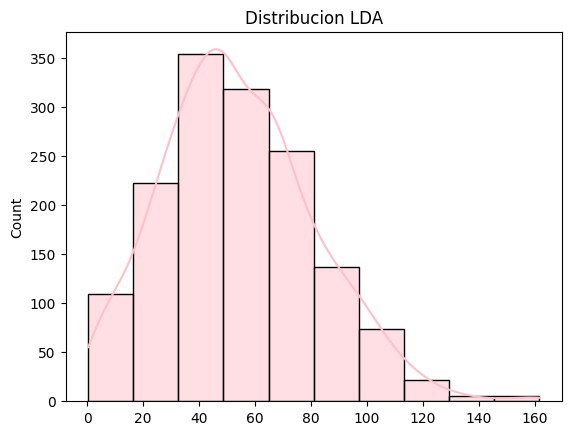

,LI,LS,ND,Perdida
0,0.427835,16.545128,109.0,8.486481
1,16.545128,32.662422,222.0,24.603775
2,32.662422,48.779716,354.0,40.721069
3,48.779716,64.897009,318.0,56.838362
4,64.897009,81.014303,255.0,72.955656
5,81.014303,97.131597,137.0,89.072950
6,97.131597,113.248890,74.0,105.190244
7,113.248890,129.366184,22.0,121.307537
8,129.366184,145.483478,5.0,137.424831
9,145.483478,161.600771,5.0,153.542125


La media de los datos es:  54.35795284724899
La varianza de los datos es:  746.4973760157775
La desviacion de los datos es:  27.32210416523181
La asimetría de los datos es:  0.4630572663350885
La curtosis de los datos es:  0.05620072169277224
Los outliers se ubican en:  [  18   52   58   63  100  104  122  170  207  237  322  352  369  378
  460  496  503  504  593  599  625  671  731  761  765  782  825  836
  874  885  906  964 1018 1024 1029 1039 1083 1117 1151 1161 1192 1193
 1203 1276 1390 1433]
Las pérdidas esperadas son:  809
El costo de aseguramiento de cada credito:  160.70668633158058
Las pérdidas catastróficas son:  2
Las pérdidas no esperadas son:  690
Año 4
Hoja 2


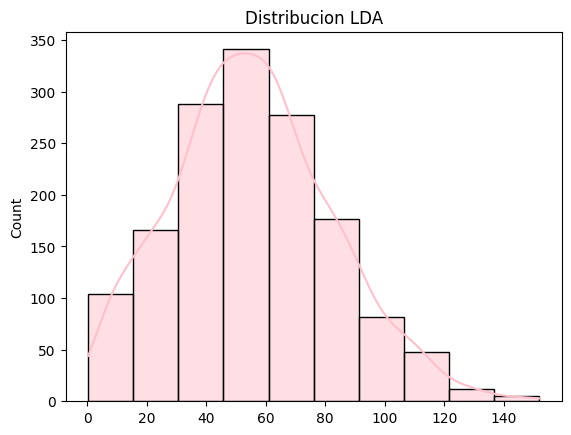

,LI,LS,ND,Perdida
0,0.354255,15.502616,104.0,7.928435
1,15.502616,30.650978,166.0,23.076797
2,30.650978,45.799339,288.0,38.225159
3,45.799339,60.947701,341.0,53.373520
4,60.947701,76.096063,277.0,68.521882
5,76.096063,91.244424,177.0,83.670243
6,91.244424,106.392786,82.0,98.818605
7,106.392786,121.541148,48.0,113.966967
8,121.541148,136.689509,12.0,129.115328
9,136.689509,151.837871,5.0,144.263690


La media de los datos es:  55.66597231387269
La varianza de los datos es:  738.0837467102078
La desviacion de los datos es:  27.167696750188593
La asimetría de los datos es:  0.33970946303261645
La curtosis de los datos es:  -0.1037825028068542
Los outliers se ubican en:  [  25   32   52   71  114  155  259  294  335  342  361  373  386  388
  394  407  435  529  532  537  540  639  660  700  733  735  747  775
  813  829  853  912  916  926  945  948  970  985  998 1016 1048 1049
 1084 1094 1175 1221 1292 1298 1327 1413]
Las pérdidas esperadas son:  781
El costo de aseguramiento de cada credito:  147.29776773898615
Las pérdidas catastróficas son:  2
Las pérdidas no esperadas son:  717


In [48]:
nxl="/content/drive/MyDrive/Integracion de datos 2025-2/1. SolicitantesCrédito(USD)_Años.xlsx"
m1=0
for k in range(5,1,-1):
  m1=m1+1
  print("Año",m1)
  print("Hoja",k)
  XDB = pd.read_excel(nxl,sheet_name=k)
  LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
  XDB["LDA"]=LDA
  #display(XDB)
  e1,e2,e3,e4=Histx(LDA)

  #Mostrar la tabla con los resultados de la caracterización LDA
  T1=np.column_stack((e1,e2,e3,e4))
  df=pd.DataFrame(T1,columns=["LI","LS","ND","Perdida"])
  display(df)

  e5,e6,e7,e8,e9,e10=Caractx(e3,e4)
  print("La media de los datos es: ",e5)
  print("La varianza de los datos es: ",e6)
  print("La desviacion de los datos es: ",e7)
  print("La asimetría de los datos es: ",e8)
  print("La curtosis de los datos es: ",e9)
  print("Los outliers se ubican en: ",e10)

  e11,e12,e13,e14=Perdx(e5)
  print("Las pérdidas esperadas son: ",e11)
  print("El costo de aseguramiento de cada credito: ",e12)
  print("Las pérdidas catastróficas son: ",e13)
  print("Las pérdidas no esperadas son: ",e14)

##**Análisis de Resultados**

De los resultados arrojados por el modelo frente a la caracterización de la distribución agregada de pérdidas podemos observar que el año 2 fue el año que contó con las mayores pérdidas esperadas (813 datos) con una media cercana a los 56.36 USD por evento de pérdida. Este valor fue promovido principalmente por un mayor coeficiente de asimetría el cual se ubicó cercano al 0.5. Esta distribución muestra una tendencia a tener pérdidas esperadas mucho mayores que los demás años. Se destaca en la base de los datos el año 3, el cual tuvo un total de eventos de pérdida esperados de 809 eventos, con una media cercana por evento de pérdida de 54.35 USD por pérdida. Es importante mencionar que el aumento en los valores de las pérdidas esperadas, junto con el incremento del coeficiente de asimetría, muestra la gestión de los riesgos que hizo la entidad financiera para esos años. Para los años 1 y 4 las pérdidas esperadas disminuyeron (781.729), lo que indica que se deben establecer modelos para la gestión de los riesgos con el fin de lograr resultados similares en las pérdidas esperadas similares a los años 2 y 3.